# Build Model

In [2]:
import pandas as pd
from top2vec import Top2Vec

In [20]:
CS = "cs"
MATH = "math"
PHYSICS = "physics"
SUBJECT = PHYSICS

In [3]:
data = pd.read_csv(f"../../dataset/{SUBJECT}/emb/v1.csv")
data

,title,submitted_date,text,tag_text
0,Fault Detection using Immune-Based Systems and...,2000-10-03,fault detection using immune based systems and...,"['Computational Engineering, Finance, and Scie..."
1,Robust Classification for Imprecise Environments,2000-09-13,robust classification for imprecise environmen...,['Machine Learning']
2,Tagger Evaluation Given Hierarchical Tag Sets,2000-08-09,tagger evaluation given hierarchical tag sets ...,['Computation and Language']
3,Description of GADEL,2000-03-07,description of gadel this article describes th...,"['Artificial Intelligence', 'Logic in Computer..."
4,The dynamics of iterated transportation simula...,2000-02-22,the dynamics of iterated transportation simula...,"['Adaptation and Self-Organizing Systems', 'Co..."
...,...,...,...,...
165751,Bridging Performance Gaps for Foundation Model...,2025-09-16,bridging performance gaps for foundation model...,"['Machine Learning', 'Artificial Intelligence'..."
165752,Breaking Language Barriers: Equitable Performa...,2025-08-18,breaking language barriers equitable performan...,"['Computation and Language', 'Artificial Intel..."
165753,Removal Attack and Defense on AI-generated Con...,2025-09-17,removal attack and defense on ai generated con...,['Cryptography and Security']
165754,Prototype-Guided Curriculum Learning for Zero-...,2025-08-11,prototype guided curriculum learning for zero ...,['Computer Vision and Pattern Recognition']


In [4]:
import numpy as np
from top2vec import Top2Vec
from sklearn.preprocessing import normalize

SUBJECT = "cs"
EMBEDDING_DIM = 384

data = pd.read_csv(f"../../dataset/{SUBJECT}/emb/v1.csv")
documents = data['text'].tolist()
num_docs = len(documents)

# Load pre-computed embeddings
emb_path = f"../../src/bertopic/embedding/{SUBJECT}/sentence_transformers_all_MiniLM_L6_v2_v1.mmap"
precomputed = np.array(np.memmap(
    emb_path, dtype='float32', mode='r',
    shape=(num_docs, EMBEDDING_DIM)
))

# L2 normalize (Top2Vec normalizes internally)
precomputed = normalize(precomputed)

# Build Top2Vec — it WILL re-embed (you'll need to let it)
# OR override _embed_documents:
original_embed_docs = Top2Vec._embed_documents

def patched_embed_documents(self, train_corpus, batch_size):
    """If the corpus matches our documents, use pre-computed embeddings."""
    print(f"Train Corpus = {len(train_corpus)} , Num Docs = {num_docs}")
    if len(train_corpus) == num_docs:
        print("✅ Using pre-computed document embeddings!")
        return precomputed
    else:
        # For vocab/word embeddings, use original method
        print("Using original embeded document")
        return original_embed_docs(self, train_corpus, batch_size)

Top2Vec._embed_documents = patched_embed_documents

model = Top2Vec(
    documents=documents,
    embedding_model='all-MiniLM-L6-v2',
    contextual_top2vec=False,
    ngram_vocab=False,
)

# Restore original method
Top2Vec._embed_documents = original_embed_docs

2026-02-11 19:10:26,313 - top2vec - INFO - Pre-processing documents for training
/home/nedo/Kuliah/TA/Program/.venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2026-02-11 19:10:58,096 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
2026-02-11 19:11:02,550 - top2vec - INFO - Creating joint document/word embedding


Train Corpus = 14689 , Num Docs = 165756
Using original embeded document


2026-02-11 19:11:04,391 - top2vec - INFO - Creating lower dimension embedding of documents


Train Corpus = 165756 , Num Docs = 165756
✅ Using pre-computed document embeddings!


2026-02-11 19:11:38,172 - top2vec - INFO - Finding dense areas of documents
/home/nedo/Kuliah/TA/Program/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/nedo/Kuliah/TA/Program/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2026-02-11 19:11:42,975 - top2vec - INFO - Finding topics


In [5]:
# model = Top2Vec(
#     documents=data['text'].tolist(),
#     embedding_model='all-MiniLM-L6-v2', 
#     contextual_top2vec=False,           
#     ngram_vocab=False,                   
#     speed='deep-learn'                  
# )
original_count = model.get_num_topics()
print(f"number of topics found: {original_count}")

number of topics found: 824


In [6]:
target_topic_count = 150
model.hierarchical_topic_reduction(num_topics=target_topic_count)

print(f"Topics successfully reduced to: {target_topic_count}")

Reducing topics: 100%|██████████| 674/674 [01:41<00:00,  6.62it/s]


Topics successfully reduced to: 150


In [7]:
target_topic_count = 150
topic_words, word_scores, topic_nums = model.get_topics(target_topic_count, reduced=True)
topic_sizes, _ = model.get_topic_sizes(reduced=True)
for i in range(10):
    print(f"Reduced Topic #{topic_nums[i]} | Size: {topic_sizes[i]} docs")
    print(f"Keywords: {topic_words[i][0:10]}") 
    print("-" * 30)

Reduced Topic #0 | Size: 3229 docs
Keywords: ['reinforcement' 'learns' 'learnt' 'learning' 'planning' 'ai' 'adaptively'
 'adaptive' 'rnns' 'learnable']
------------------------------
Reduced Topic #1 | Size: 2219 docs
Keywords: ['imagenet' 'cnn' 'cnns' 'deeplabv' 'recognizing' 'deepmind' 'convnets'
 'supervised' 'recognition' 'inception']
------------------------------
Reduced Topic #2 | Size: 2094 docs
Keywords: ['deeplabv' 'imagenet' 'convnets' 'cnn' 'cnns' 'deepmind' 'shapenet'
 'convnet' 'inceptionv' 'supervised']
------------------------------
Reduced Topic #3 | Size: 2072 docs
Keywords: ['multiplexing' 'multicarrier' 'mimo' 'transmitting' 'transmit' 'radios'
 'multichannel' 'transmitters' 'communications' 'channels']
------------------------------
Reduced Topic #4 | Size: 2022 docs
Keywords: ['robotics' 'robot' 'robotic' 'planning' 'learns' 'deepmind' 'automate'
 'robots' 'ai' 'autonomous']
------------------------------
Reduced Topic #5 | Size: 2013 docs
Keywords: ['multiprocess

In [ ]:
model.save(f"model_results/top2vec/{SUBJECT}_50")

## Visualization

In [21]:
loaded_model = Top2Vec.load(f"model_results/{SUBJECT}/sentence_transformers_all_MiniLM_L6_v2_v1")
# loaded_model = model

In [22]:
original_topic = loaded_model.get_num_topics() 
topic_reduced = loaded_model.get_num_topics(reduced=False)

print(f"Total Topik Asli (Granular): {original_topic}")     
print(f"Total Topik Reduksi (Merged): {topic_reduced}") 

Total Topik Asli (Granular): 687
Total Topik Reduksi (Merged): 687


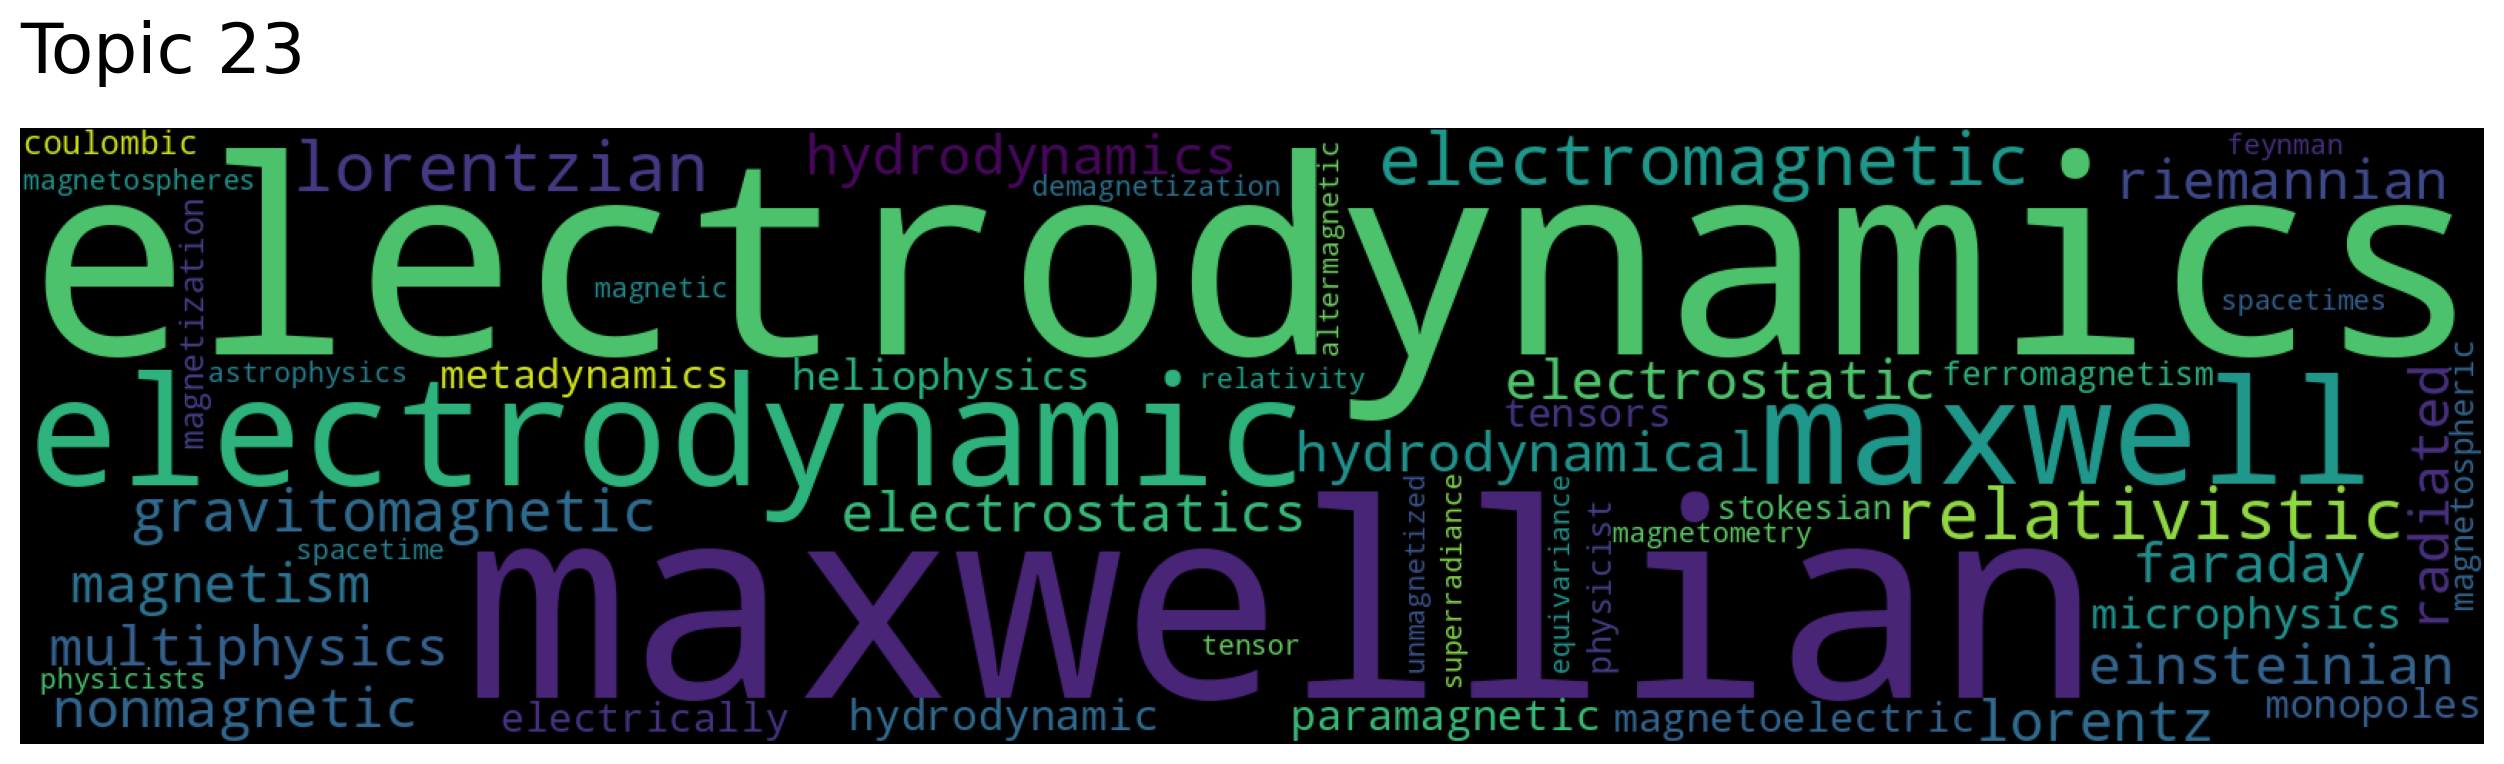

In [25]:
loaded_model.generate_topic_wordcloud(23, reduced=False)

In [10]:
data = pd.read_csv(f"../../dataset/{SUBJECT}/emb/v1.csv")

In [11]:
data['date'] = pd.to_datetime(data['submitted_date'])
data['topic_id'] = loaded_model.doc_top_reduced
topic_mapping = {}
topic_words, _, topic_nums = loaded_model.get_topics(reduced=False)
for t_num, t_words in zip(topic_nums, topic_words):
    topic_label = f"{t_num}: {'_'.join(t_words[:3])}"
    topic_mapping[t_num] = topic_label


data['topic_name'] = data['topic_id'].map(topic_mapping)

print(data[['date', 'topic_id', 'topic_name']].head())

        date topic_id topic_name
0 2000-10-03     None        NaN
1 2000-09-13     None        NaN
2 2000-08-09     None        NaN
3 2000-03-07     None        NaN
4 2000-02-22     None        NaN


In [ ]:
total_docs_per_year = data.groupby(pd.Grouper(key='date', freq='YE')).size().reset_index(name='total_docs_year')
topics_over_time = data.groupby([pd.Grouper(key='date', freq='YE'), 'topic_name']).size().reset_index(name='count')
merged_data = pd.merge(topics_over_time, total_docs_per_year, on='date', how='left')
merged_data['proportion'] = merged_data['count'] / merged_data['total_docs_year']
top_5_topics = data['topic_name'].value_counts().head(5).index.tolist()
filtered_data = merged_data[merged_data['topic_name'].isin(top_5_topics)]

In [ ]:
import plotly.express as px
fig = px.line(
    filtered_data, 
    x='date', 
    y='proportion', 
    color='topic_name',
    title='Perkembangan Topik Riset arXiv Seiring Waktu',
    labels={
        'proportion': 'Proporsi (0 - 1)', 
        'date': 'Waktu',
        'topic_name': 'Nama Topik'
    },
    markers=True 
)

fig.update_layout(
    hovermode="closest", 
    xaxis_title="Bulan/Tahun",
    yaxis_title="Frekuensi Topik"
)

fig.show()

# Coherence Score



In [9]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

In [ ]:
# data = pd.read_csv(f"dataset/arxiv_{SUBJECT}_emb.csv")

In [10]:
# loaded_model = Top2Vec.load(f"model_results/top2vec/{SUBJECT}_50")
loaded_model = model

In [11]:
tokenize_data = [text.split() for text in data['text'].tolist()]
dictionary = Dictionary(tokenize_data)

In [12]:
topic_words , word_scores , topic_nums = loaded_model.get_topics(loaded_model.get_num_topics(reduced=True), reduced=True)
top_n = 5
topic_words_sliced = topic_words[:, :top_n]

In [13]:
coherence_model = CoherenceModel(
    topics=topic_words_sliced.tolist(), 
    texts=tokenize_data,         
    dictionary=dictionary,
    coherence='c_v',             
    processes=1
)
coherence_score = coherence_model.get_coherence()
print(f"Coherence score : {coherence_score}")

Coherence score : 0.5687190922592031
